<function matplotlib.pyplot.show(close=None, block=None)>

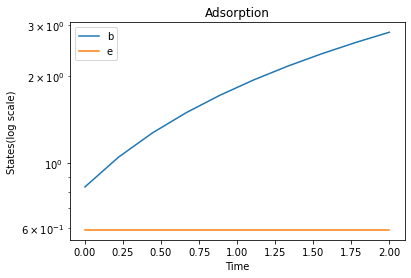

In [75]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jul 13 10:41:09 2021

@author: ghafoor_msc
"""
#importing important libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd


#writing the function for the coupled system of equations
def coupled_pde_func(x,t):
    
    #defining all the required constants
    k1=60
    k2=12
    k3=19.6
    k4=75.1
    k5=19.8
    kCo2=375.3
    Co2=0.1889
    ohmCo2=0.038
    N=20
    L=1
    dx=L/N
    DCo2=0.549
    DH20=0.873
    dt=0.1 
    t_final=150 #--final time(t=150)
    T0=0        #---initial time (t=0)
    
    #assigning each ODE a vector element (Conversion from scalar to vector components)
    A=x[0]   # ---A= Cco2
    B=x[1]   # ---B=CH2o
    C=x[2]   # ---C=0Co2
    P=x[3]   # ---P=0H20
    
    t = np.linspace(0, 10, 150)  #--defining the time vector ranging from 0-10(can be changed based on ones preference)
    dt = np.diff(t)              #--defining the change in time (t)
    x=np.linspace(dx/2,L-dx/2,N) #--converting the x-components into a sort of array with given dimensions
    A=np.ones(N)*T0              #--initializing the vector functions to start at time (t=0)
    B=np.ones(N)*T0
    C=np.ones(N)*T0
    P=np.ones(N)*T0
    dAdt=np.empty(N)             #--initializing the derivertives for components A,B,C,P
    dBdt=np.empty(N)
    dCdt=np.empty(N)
    dPdt=np.empty(N)
    t1=np.arange(0,150,0.1)      #--defining a variable (t1) to setting the end point for our derivertive functions
 
    
    
    #defining the ODES
    for j in range(1,len(t1)):    #running a nested for_loop to help in defining the Odes 
        for i in range(1,N-1):
            #the 4-system of coupled equations
            dAdt[i]=-(A[i+1]-A[i-1])/2*dx+(DCo2*(A[i+1]-2*A[i]+A[i-1]))/dx**2-(k1-Co2)*(1-C[i]-P[i])
            dBdt[i]=-(B[i+1]-B[i-1])/2*dx+(DH20*(B[i+1]-2*B[i]+B[i+1]))/dx**2+k2*A[i]*P[i]-k3*(1-C[i]-P[i])-(k4*B[i])/(1+Co2*A[i])
            dCdt[i]=-((k1*Co2)*(1-C[i]-P[i]))/ohmCo2
            dPdt=(k2*A*P)-k3*(1-C-P)-(k4*B*C)/(1+kCo2*A)+k5*A*C*P
            
            #the function returns several outputs,so you can run each to see the output
            df0=[dAdt[0],dBdt[0],dCdt[0],dPdt[0]]
#             df1=[dAdt[1],dBdt[1],dCdt[1],dPdt[1]]
#             df2=[dAdt[2],dBdt[2],dCdt[2],dPdt[2]]
#             df3=[dAdt[3],dBdt[3],dCdt[3],dPdt[3]]
            
    return df0

#printing out some initial conditions
x0=[0.83,0.59,0.8,150]

#print(coupled_pde_func(x=x0,t=0))  
s=(coupled_pde_func(x=x0,t=0)) 
 
##solving the system using odeint ----declaring a time vector

t=np.linspace(0,2,10)             #---you can change the values of the parameter depending on the choice

x=odeint(coupled_pde_func,x0,t)   #---calling the ODEINT function to solve our coupled_system  of equations

A=x[:,0]    #storing the outputs of the ODEINT results in the following defined vector components
B=x[:,1]
C=x[:,2]
P=x[:,3]

plt.semilogy(t,A,label='Cco2')    #--plotting the Components Cco2,CH20,0Co2,0H20 
plt.semilogy(t,B,label='CH2o')    #--using the semilogy function for a better scaling for exponentially increasing components
plt.ylabel('States(log scale)')
plt.title('Adsorption')
plt.xlabel('Time')
plt.legend('best')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

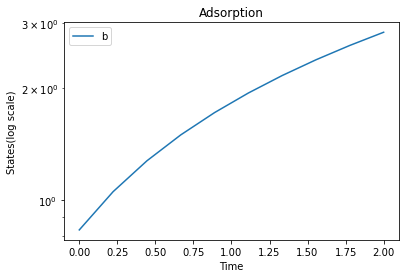

In [76]:
plt.semilogy(t,A,label='Cco2')   #--plot for component Cco2
plt.ylabel('States(log scale)')
plt.title('Adsorption')
plt.xlabel('Time')
plt.legend('best')
plt.show

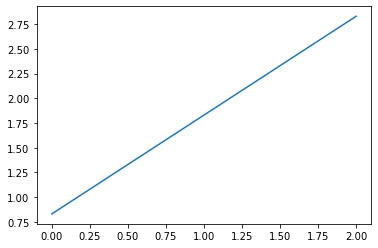

In [82]:
plt.plot(t,A,label='Cco2')

<function matplotlib.pyplot.show(close=None, block=None)>

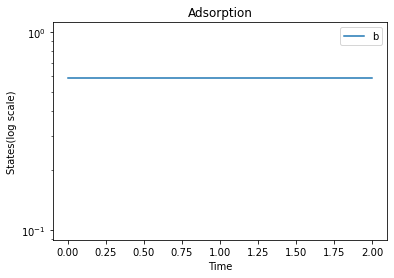

In [88]:
plt.semilogy(t,B,label='CH2o')   #--plot for component CH2o
plt.ylabel('States(log scale)')
plt.title('Adsorption')
plt.xlabel('Time')
plt.legend('best')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

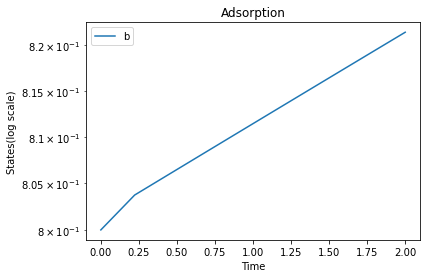

In [89]:
plt.semilogy(t,C,label='0Co2')     #--plot for component 0Co2
plt.ylabel('States(log scale)')
plt.title('Adsorption')
plt.xlabel('Time')
plt.legend('best')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

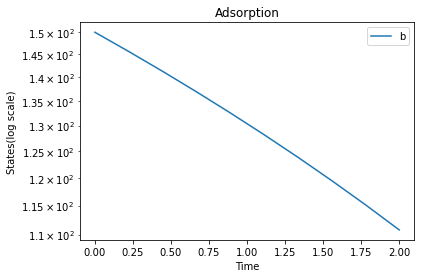

In [90]:
plt.semilogy(t,P,label='0H2o')     #--plot for component 0H2o
plt.ylabel('States(log scale)')
plt.title('Adsorption')
plt.xlabel('Time')
plt.legend('best')
plt.show